In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#parte 1
import pandas as pd
import numpy as np

# Definir las rutas correctas
ruta_individual_2004 = "/content/drive/MyDrive/Colab Notebooks/BigData_TP1_Grupo11/TP2/usu_individual_T104.dta/Individual_t104.dta"
ruta_hogar_2004 = "/content/drive/MyDrive/Colab Notebooks/BigData_TP1_Grupo11/TP2/usu_individual_T104.dta/Hogar_t104.dta"
ruta_individual_2024 = "/content/drive/MyDrive/Colab Notebooks/BigData_TP1_Grupo11/TP2/usu_individual_T124.xls/EPH_usu_1er_Trim_2024_xlsx/usu_individual_T124.xlsx"
ruta_hogar_2024 = "/content/drive/MyDrive/Colab Notebooks/BigData_TP1_Grupo11/TP2/usu_individual_T124.xls/EPH_usu_1er_Trim_2024_xlsx/usu_hogar_T124.xlsx"

try:
    # Cargar los datasets
    df_individual_2004 = pd.read_stata(ruta_individual_2004)
    df_hogar_2004 = pd.read_stata(ruta_hogar_2004)
    df_individual_2024 = pd.read_excel(ruta_individual_2024)
    df_hogar_2024 = pd.read_excel(ruta_hogar_2024)

    # Verificar que se cargaron correctamente
    print("Datasets cargados exitosamente!")
    print("\nDimensiones de los datasets:")
    print(f"Individual 2004: {df_individual_2004.shape}")
    print(f"Hogar 2004: {df_hogar_2004.shape}")
    print(f"Individual 2024: {df_individual_2024.shape}")
    print(f"Hogar 2024: {df_hogar_2024.shape}")

    # Mostrar las primeras filas de cada dataset
    print("\nPrimeras filas del dataset Individual 2004:")
    print(df_individual_2004.head())

except Exception as e:
    print(f"Error al cargar los archivos: {str(e)}")

# Guardar las referencias de los datasets en variables para uso futuro
if 'df_individual_2004' in locals():
    print("\nVariables disponibles para uso:")
    print("- df_individual_2004: Dataset individual 2004")
    print("- df_hogar_2004: Dataset hogar 2004")
    print("- df_individual_2024: Dataset individual 2024")
    print("- df_hogar_2024: Dataset hogar 2024")

Datasets cargados exitosamente!

Dimensiones de los datasets:
Individual 2004: (45289, 176)
Hogar 2004: (12816, 88)
Individual 2024: (46050, 177)
Hogar 2024: (16104, 88)

Primeras filas del dataset Individual 2004:
     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran B

In [ ]:
# 1. Para 2004, la columna es 'aglomerado' (minúsculas) y contiene texto
# 2. Para 2024, la columna es 'AGLOMERADO' (mayúsculas) y contiene números

# Primero veamos los valores únicos en cada dataset
print("Valores únicos en aglomerado 2004:")
print(df_individual_2004['aglomerado'].unique())

print("\nValores únicos en AGLOMERADO 2024:")
print(df_individual_2024['AGLOMERADO'].unique())

# Para 2004, necesitamos filtrar por "Ciudad de Buenos Aires"
df_2004_caba = df_individual_2004[df_individual_2004['aglomerado'] == "Ciudad de Buenos Aires"].copy()

# Para 2024, filtramos por el código 32
df_2024_caba = df_individual_2024[df_individual_2024['AGLOMERADO'] == 32].copy()

print("\nDimensiones de los datasets filtrados:")
print(f"CABA 2004: {df_2004_caba.shape}")
print(f"CABA 2024: {df_2024_caba.shape}")

# Seleccionar las 15 variables de interés
variables_2004 = [
    'aglomerado',  # Región/Aglomerado
    'ch04',        # Edad
    'ch06',        # Nivel educativo
    'estado',      # Condición de actividad
    'cat_ocup',    # Categoría ocupacional
    'p21',         # Horas trabajadas
    'pondera',     # Ponderador
    'ch03',        # Sexo
    'nivel_ed',    # Nivel educativo agregado
    'itf',         # Ingreso total familiar
    'ipcf',        # Ingreso per cápita familiar
    'p47t',        # Ingreso total
    'pp3e_tot',    # Ingreso de la ocupación principal
    'pp04d_cod',   # Código de ocupación
    'pp04b_cod'    # Código de actividad
]

variables_2024 = [
    'AGLOMERADO',
    'CH04',
    'CH06',
    'ESTADO',
    'CAT_OCUP',
    'P21',
    'PONDERA',
    'CH03',
    'NIVEL_ED',
    'ITF',
    'IPCF',
    'P47T',
    'PP3E_TOT',
    'PP04D_COD',
    'PP04B_COD'
]

# Crear los dataframes filtrados
df_2004_caba_filtered = df_2004_caba[variables_2004]
df_2024_caba_filtered = df_2024_caba[variables_2024]

# Función para analizar valores faltantes
def analizar_faltantes(df, año):
    na_count = df.isna().sum()
    na_percent = (df.isna().sum() / len(df)) * 100

    missing_info = pd.DataFrame({
        'Valores Faltantes': na_count,
        'Porcentaje Faltantes': na_percent.round(2)
    })
    missing_info['Año'] = año
    return missing_info[missing_info['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

print("\nAnálisis de valores faltantes en CABA 2004:")
print(analizar_faltantes(df_2004_caba_filtered, 2004))
print("\nAnálisis de valores faltantes en CABA 2024:")
print(analizar_faltantes(df_2024_caba_filtered, 2024))

# Verificar valores sin sentido en variables numéricas
variables_numericas_2004 = ['ch04', 'p21', 'itf', 'ipcf', 'p47t', 'pp3e_tot']
variables_numericas_2024 = ['CH04', 'P21', 'ITF', 'IPCF', 'P47T', 'PP3E_TOT']

print("\nEstadísticas descriptivas de variables numéricas:")
for var_2004, var_2024 in zip(variables_numericas_2004, variables_numericas_2024):
    print(f"\nVariable 2004 ({var_2004}):")
    print(df_2004_caba_filtered[var_2004].describe())
    print(f"\nVariable 2024 ({var_2024}):")
    print(df_2024_caba_filtered[var_2024].describe())

Valores únicos en aglomerado 2004:
['Ciudad de Buenos Aires', 'Partidos del GBA', 'Santiago del Estero - La Banda', 'Jujuy - Palpalá', 'Gran Catamarca', ..., 'Río Cuarto', 'Comodoro Rivadavia - Rada Tilly', 'Neuquén - Plottier', 'Río Gallegos', 'Ushuaia - Río Grande']
Length: 29
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' <
                          ... < 'Ciudad de Buenos Aires' < 'Partidos del GBA' <
                          'Mar del Plata - Batán' < 'Río Cuarto']

Valores únicos en AGLOMERADO 2024:
[10  7 18 25  8  5 19 30 15 27 26 29  4 36 93 91 13  2 12 20  3 34 33 22
  9  6 17 31 23 38 32 14]

Dimensiones de los datasets filtrados:
CABA 2004: (1836, 176)
CABA 2024: (1422, 177)

Análisis de valores faltantes en CABA 2004:
Empty DataFrame
Columns: [Valores Faltantes, Porcentaje Faltantes, Año]
Index: []

Análisis de valores faltantes en CABA 2024:
           Valores Faltantes  Porcentaje Faltantes   Año
PP3E_TOT            

In [ ]:
# 1. Limpiar valores negativos en P21 y P47T
df_2024_caba_filtered.loc[df_2024_caba_filtered['P21'] < 0, 'P21'] = None
df_2024_caba_filtered.loc[df_2024_caba_filtered['P47T'] < 0, 'P47T'] = None

# 2. Limitar horas trabajadas a un máximo razonable (168 horas semanales)
df_2004_caba_filtered.loc[df_2004_caba_filtered['p21'] > 168, 'p21'] = None
df_2024_caba_filtered.loc[df_2024_caba_filtered['P21'] > 168, 'P21'] = None

# 3. Verificar los resultados después de la limpieza
print("Estadísticas después de la limpieza:")
print("\nHoras trabajadas 2004:")
print(df_2004_caba_filtered['p21'].describe())
print("\nHoras trabajadas 2024:")
print(df_2024_caba_filtered['P21'].describe())
print("\nIngresos totales 2024:")
print(df_2024_caba_filtered['P47T'].describe())

Estadísticas después de la limpieza:

Horas trabajadas 2004:
count    1102.000000
mean        3.970054
std        21.479010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       160.000000
Name: p21, dtype: float64

Horas trabajadas 2024:
count    685.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: P21, dtype: float64

Ingresos totales 2024:
count    1.123000e+03
mean     3.931366e+05
std      6.771500e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.200000e+05
75%      5.200000e+05
max      1.100000e+07
Name: P47T, dtype: float64


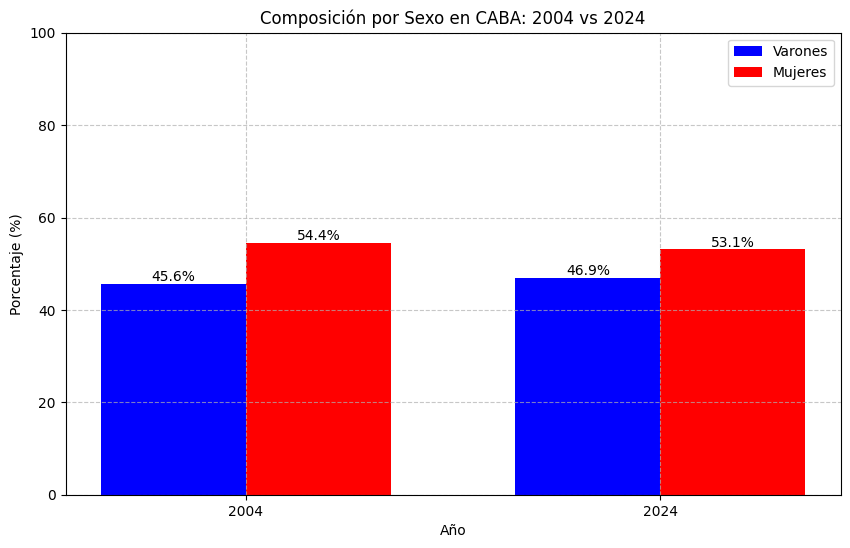


Cantidades absolutas 2004:
Total: 1836
Varones: 837 (45.6%)
Mujeres: 999 (54.4%)

Cantidades absolutas 2024:
Total: 1422
Varones: 667 (46.9%)
Mujeres: 755 (53.1%)


In [ ]:
#Parte 2 A
import matplotlib.pyplot as plt
import numpy as np

# Calcular porcentajes para 2004
total_2004 = len(df_2004_caba_filtered)
varones_2004 = (df_2004_caba_filtered['ch04'] == "Varón").sum()
mujeres_2004 = (df_2004_caba_filtered['ch04'] == "Mujer").sum()
porc_varones_2004 = (varones_2004/total_2004) * 100
porc_mujeres_2004 = (mujeres_2004/total_2004) * 100

# Calcular porcentajes para 2024
total_2024 = len(df_2024_caba_filtered)
varones_2024 = (df_2024_caba_filtered['CH04'] == 1).sum()
mujeres_2024 = (df_2024_caba_filtered['CH04'] == 2).sum()
porc_varones_2024 = (varones_2024/total_2024) * 100
porc_mujeres_2024 = (mujeres_2024/total_2024) * 100

# Crear figura y ejes
plt.figure(figsize=(10, 6))

# Configuración de las barras
x = np.arange(2)  # Posiciones para las barras
width = 0.35  # Ancho de las barras

# Crear las barras
plt.bar(x - width/2, [porc_varones_2004, porc_varones_2024], width, label='Varones', color='blue')
plt.bar(x + width/2, [porc_mujeres_2004, porc_mujeres_2024], width, label='Mujeres', color='red')

# Añadir etiquetas de datos
for i, (v1, v2) in enumerate(zip([porc_varones_2004, porc_varones_2024],
                                [porc_mujeres_2004, porc_mujeres_2024])):
    plt.text(i - width/2, v1, f'{v1:.1f}%', ha='center', va='bottom')
    plt.text(i + width/2, v2, f'{v2:.1f}%', ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Composición por Sexo en CABA: 2004 vs 2024')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(x, ['2004', '2024'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del eje y
plt.ylim(0, 100)

# Mostrar el gráfico
plt.show()

# Imprimir los valores para verificación
print("\nCantidades absolutas 2004:")
print(f"Total: {total_2004}")
print(f"Varones: {varones_2004} ({porc_varones_2004:.1f}%)")
print(f"Mujeres: {mujeres_2004} ({porc_mujeres_2004:.1f}%)")

print("\nCantidades absolutas 2024:")
print(f"Total: {total_2024}")
print(f"Varones: {varones_2024} ({porc_varones_2024:.1f}%)")
print(f"Mujeres: {mujeres_2024} ({porc_mujeres_2024:.1f}%)")

Valores únicos en ch06 (2004):
[79.0, 67.0, 74.0, 54.0, 51.0, ..., 96.0, 84.0, 90.0, 94.0, 88.0]
Length: 95
Categories (99, object): ['Menos de 1 año' < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < '98 y más años']

Valores únicos en CH06 (2024):
[64 51 15 33 58 40 73 63 84 61 60 37  7 30  1 57 29 41 78 27 22 68 69 71
 59 52 25 80 75 20 74 79 72 49 36 45 47 21 17 88 39  3 13 10 70 89 38  9
 31 43 44 18 14 35 34 67 12 26 85 65 42 50 19 86 23 55 46 62 54 56 24 77
  2 76 95 28  6 -1 48  5 90 32 53 82 16  8 66 81  4 91 83 92 94 11 97 93
 87]


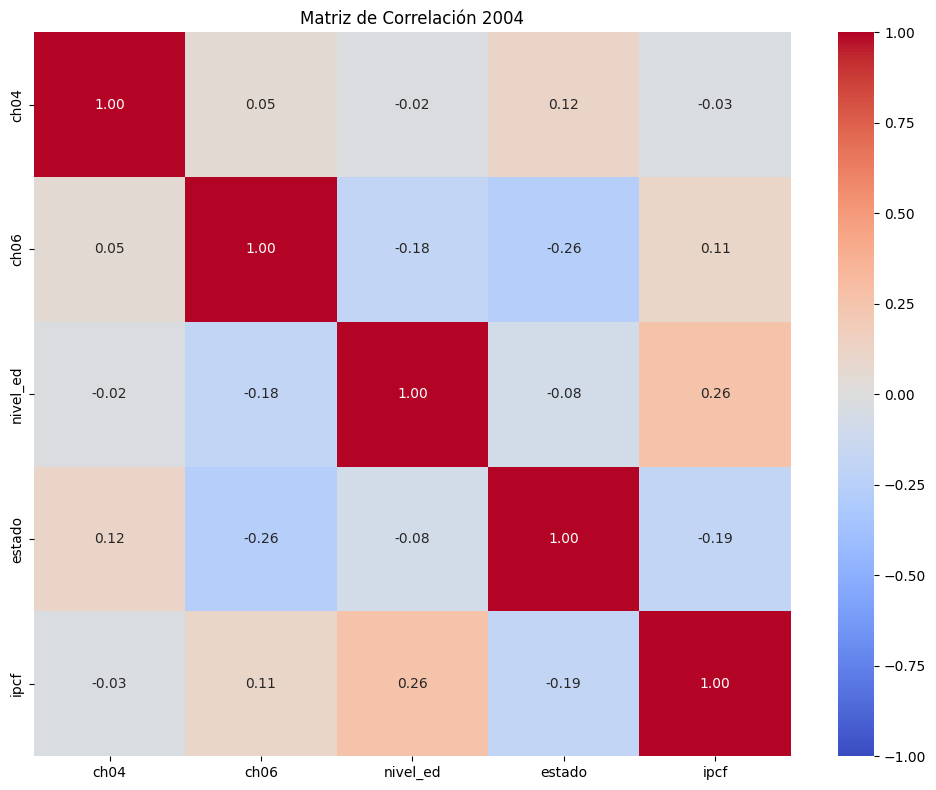

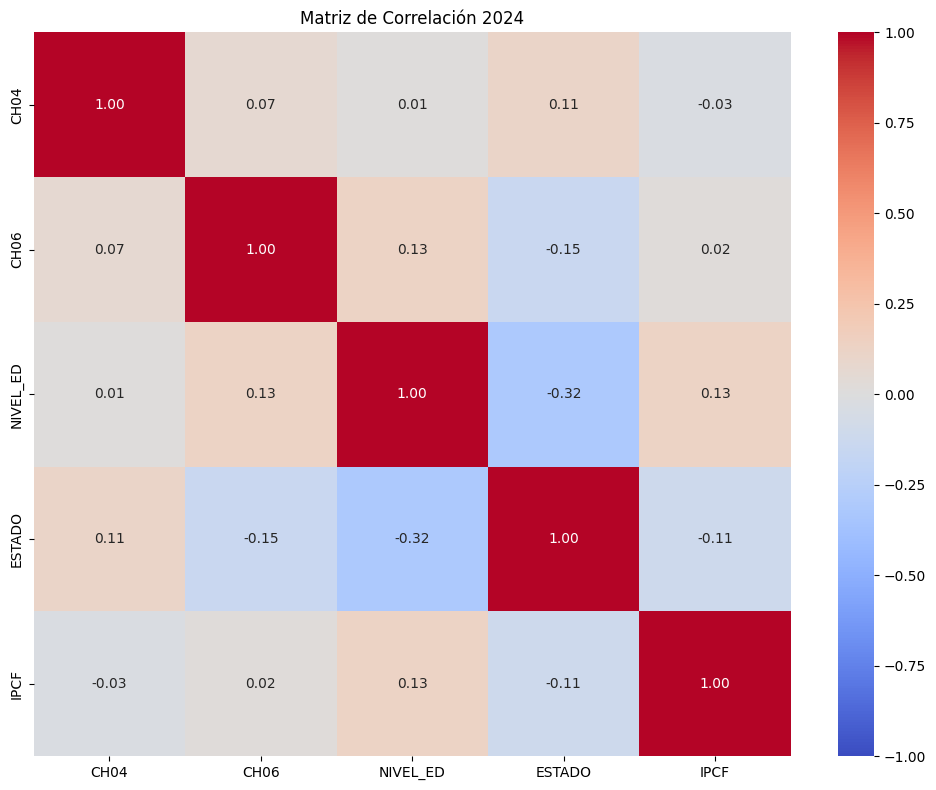


Correlaciones más fuertes 2004:
ipcf - nivel_ed: 0.264
estado - ch06: -0.263
ipcf - estado: -0.186
nivel_ed - ch06: -0.183
estado - ch04: 0.115

Correlaciones más fuertes 2024:
ESTADO - NIVEL_ED: -0.317
ESTADO - CH06: -0.148
IPCF - NIVEL_ED: 0.129
NIVEL_ED - CH06: 0.129
ESTADO - CH04: 0.114


In [ ]:
#Parte 2 b
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crear copias de los dataframes para no modificar los originales
df_2004_corr = df_2004_caba_filtered.copy()
df_2024_corr = df_2024_caba_filtered.copy()

# Imprimir valores únicos para entender los datos
print("Valores únicos en ch06 (2004):")
print(df_2004_corr['ch06'].unique())
print("\nValores únicos en CH06 (2024):")
print(df_2024_corr['CH06'].unique())

# Función para convertir edades a números
def convertir_edad(edad):
    if isinstance(edad, (int, float)):
        return edad
    if isinstance(edad, str):
        if edad == "Menos de 1 año":
            return 0
        try:
            return float(edad)
        except:
            return np.nan

# Convertir variables categóricas a numéricas
# Para 2004
df_2004_corr['ch04'] = pd.Categorical(df_2004_corr['ch04']).codes  # Sexo
df_2004_corr['ch06'] = df_2004_corr['ch06'].apply(convertir_edad)  # Edad
df_2004_corr['nivel_ed'] = pd.Categorical(df_2004_corr['nivel_ed']).codes
df_2004_corr['estado'] = pd.Categorical(df_2004_corr['estado']).codes

# Para 2024
df_2024_corr['CH04'] = pd.to_numeric(df_2024_corr['CH04'])
df_2024_corr['CH06'] = pd.to_numeric(df_2024_corr['CH06'])
df_2024_corr['NIVEL_ED'] = pd.Categorical(df_2024_corr['NIVEL_ED']).codes
df_2024_corr['ESTADO'] = pd.Categorical(df_2024_corr['ESTADO']).codes

# Variables para la correlación
variables_2004 = ['ch04', 'ch06', 'nivel_ed', 'estado', 'ipcf']
variables_2024 = ['CH04', 'CH06', 'NIVEL_ED', 'ESTADO', 'IPCF']

# Calcular correlaciones
correlation_2004 = df_2004_corr[variables_2004].corr()
correlation_2024 = df_2024_corr[variables_2024].corr()

# Crear el gráfico para 2004
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2004,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            vmin=-1, vmax=1)

plt.title('Matriz de Correlación 2004')
plt.tight_layout()
plt.show()

# Crear el gráfico para 2024
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2024,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            vmin=-1, vmax=1)

plt.title('Matriz de Correlación 2024')
plt.tight_layout()
plt.show()

# Agregar etiquetas explicativas para las variables
variable_names = {
    'ch04/CH04': 'Sexo',
    'ch06/CH06': 'Edad',
    'nivel_ed/NIVEL_ED': 'Nivel Educativo',
    'estado/ESTADO': 'Estado Laboral',
    'ipcf/IPCF': 'Ingreso per Cápita Familiar'
}

# Imprimir las correlaciones más fuertes con nombres descriptivos
print("\nCorrelaciones más fuertes 2004:")
mask = np.triu(np.ones_like(correlation_2004), k=1).astype(bool)
correlations_2004 = correlation_2004.where(mask).unstack()
sorted_correlations_2004 = correlations_2004.sort_values(key=abs, ascending=False)
for idx, value in sorted_correlations_2004[sorted_correlations_2004.notna()][:5].items():
    var1, var2 = idx
    print(f"{variable_names.get(var1, var1)} - {variable_names.get(var2, var2)}: {value:.3f}")

print("\nCorrelaciones más fuertes 2024:")
mask = np.triu(np.ones_like(correlation_2024), k=1).astype(bool)
correlations_2024 = correlation_2024.where(mask).unstack()
sorted_correlations_2024 = correlations_2024.sort_values(key=abs, ascending=False)
for idx, value in sorted_correlations_2024[sorted_correlations_2024.notna()][:5].items():
    var1, var2 = idx
    print(f"{variable_names.get(var1, var1)} - {variable_names.get(var2, var2)}: {value:.3f}")